___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project Exercise
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd
data = pd.read_csv("bank_note_data.csv")

In [2]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


** Check the head of the Data **

## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [3]:
import seaborn as sns
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

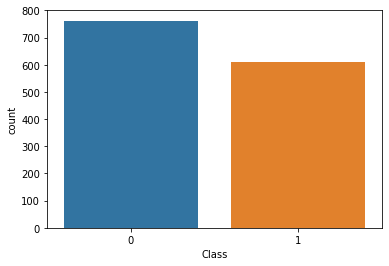

In [4]:
sns.countplot(x='Class', data = data)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

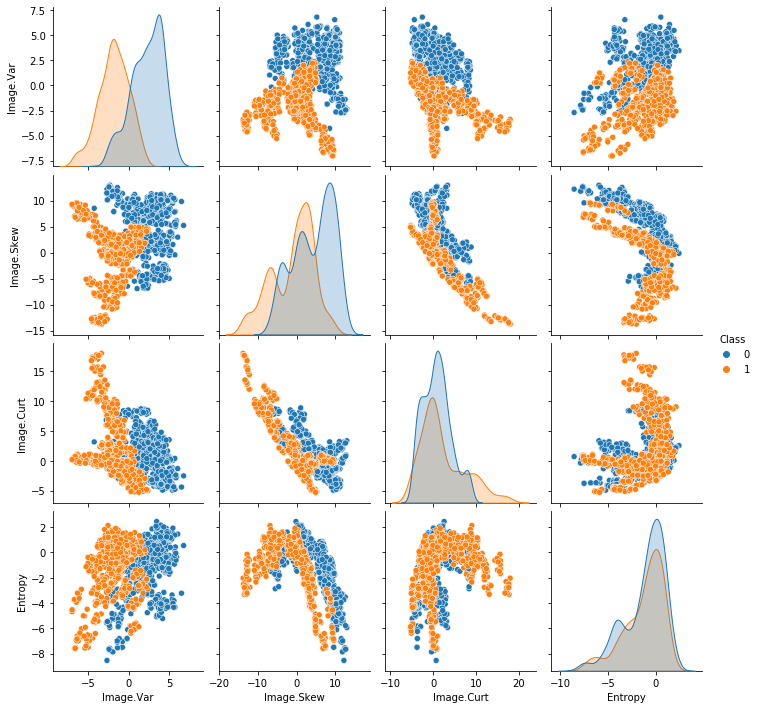

In [5]:
sns.pairplot(data = data, hue = 'Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling



In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Create a StandardScaler() object called scaler.**

In [7]:
X = data.drop('Class', axis = 1)
y = data['Class']
scaler.fit(X, y = y)

StandardScaler()

**Fit scaler to the features.**

In [8]:
scaled_features = scaler.transform(X)

**Use the .transform() method to transform the features to a scaled version.**

In [9]:
scaled_df = pd.DataFrame(data = scaled_features, columns=['Image.Var','Image.Skew','Image.Curt','Entropy'] )
scaled_df

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [10]:
X = scaled_df
y = data['Class']

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [12]:
import tensorflow as tf

# Tensorflow

In [13]:
ImageVar = tf.feature_column.numeric_column('Image.Var')
Imageskew = tf.feature_column.numeric_column('Image.Skew')
imagecurt = tf.feature_column.numeric_column('Image.Curt')
entropy = tf.feature_column.numeric_column('Entropy')

** Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [15]:
feat_cols = [ImageVar, Imageskew, imagecurt, entropy ]


In [16]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Ollie\\AppData\\Local\\Temp\\tmpospt2092', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

** Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big. **

In [ ]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,num_epochs=5,shuffle=True)

** Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [22]:
classifier.train(input_fn=input_func,steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Marcial\AppData\Local\Temp\tmpw8v7z_z6\model.ckpt.
INFO:tensorflow:loss = 13.792015, step = 1
INFO:tensorflow:Saving checkpoints for 48 into C:\Users\Marcial\AppData\Local\Temp\tmpw8v7z_z6\model.ckpt.
INFO:tensorflow:Loss for final step: 0.47980386.


## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [23]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

** Use the predict method from the classifier model to create predictions from X_test **

In [24]:
note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Marcial\AppData\Local\Temp\tmpw8v7z_z6\model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [25]:
note_predictions[0]

{'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'logistic': array([0.00157453], dtype=float32),
 'logits': array([-6.4522204], dtype=float32),
 'probabilities': array([0.9984255 , 0.00157453], dtype=float32)}

In [26]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,final_preds))

[[213   2]
 [ 10 187]]


In [29]:
print(classification_report(y_test,final_preds))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       215
          1       0.99      0.95      0.97       197

avg / total       0.97      0.97      0.97       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(n_estimators=200)

In [32]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [33]:
rfc_preds = rfc.predict(X_test)

In [34]:
print(classification_report(y_test,rfc_preds))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       215
          1       0.99      0.99      0.99       197

avg / total       0.99      0.99      0.99       412



In [35]:
print(confusion_matrix(y_test,rfc_preds))

[[214   1]
 [  2 195]]


** It should have also done very well, possibly perfect! Hopefully you have seen the power of DNN! **

# Great Job!